In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import datetime

In [30]:
purchases = pd.read_csv('item_purchases.csv')
purchases.head()

,purno,vendno,custno,transfer,item,cost,qtyord,qtyrec,created
0,86001,13921,NaN,Y,6c18dd9a3e59,0.41666,300,300,8/1/16
1,86001,13921,NaN,Y,13dfaee8f27f,20.00000,1,1,8/1/16
2,86024,176700,120100.0,N,b75abbebcbdc,0.09000,25000,25000,8/8/16
3,86024,176700,120100.0,N,13dfaee8f27f,0.00000,1,1,8/8/16
4,86026,176700,120100.0,N,e7f2d04e6d17,0.12000,10000,10000,8/8/16


In [31]:
purchases.item.nunique

<bound method IndexOpsMixin.nunique of 0        6c18dd9a3e59
1        13dfaee8f27f
2        b75abbebcbdc
3        13dfaee8f27f
4        e7f2d04e6d17
             ...     
14103    ca34ab5c748c
14104    384791dfe829
14105    7aa693965f8e
14106    7aa693965f8e
14107    36988ba56e79
Name: item, Length: 14108, dtype: object>

In [39]:
purchases['created'] = pd.to_datetime(purchases['created'])

In [52]:
purchases['year'] = purchases['created'].dt.to_period('Y')
purchases.head()

,purno,vendno,custno,transfer,item,cost,qtyord,qtyrec,created,year
0,86001,13921,NaN,Y,6c18dd9a3e59,0.41666,300,300,2016-08-01,2016
1,86001,13921,NaN,Y,13dfaee8f27f,20.00000,1,1,2016-08-01,2016
2,86024,176700,120100.0,N,b75abbebcbdc,0.09000,25000,25000,2016-08-08,2016
3,86024,176700,120100.0,N,13dfaee8f27f,0.00000,1,1,2016-08-08,2016
4,86026,176700,120100.0,N,e7f2d04e6d17,0.12000,10000,10000,2016-08-08,2016


In [76]:
purchases_by_item = pd.pivot_table(purchases,index=["item"],
               values=["qtyrec"],
               aggfunc='count',fill_value=0,
               columns=["year"])

purchases_by_item = purchases_by_item.sort_values(by=[('qtyrec', '2018')], ascending=False)


In [77]:
purchases_by_item.head(20)

qtyrec               
year           2016 2017 2018 2019
item                              
13dfaee8f27f    137  335  347  192
4c5a6dbee2a5    125  229  293  265
ca34ab5c748c     97  188  276  182
1d8e9ff5785a     63  145  172  148
2d3d80fbb900     71  142  112   69
0a960a82d511     25   74   62   45
7aa693965f8e      0    0   58   48
591e962e7514      9    9   23   13
1839e194af5c     15    7   21    1
1d97e26bf055     10   22   19   17
58853e626a82      1   18   17    6
905cd271cdb7      7   15   16    7
6eb8d2e33c57     18    8   16    4
5dd61efe4c79      4   12   14    8
cecf9964d4c2      5   11   13    7
ce507b64d5ac      5    8   13    7
fb878ac2fe2a      3    3   13    1
2d281bbe5406      5    6   13    6
d7204c11960d     10   15   12    4
384791dfe829      3    2   10    2

In [79]:
purchases_by_item = purchases_by_item.drop(['13dfaee8f27f','4c5a6dbee2a5','ca34ab5c748c','1d8e9ff5785a','2d3d80fbb900','0a960a82d511','7aa693965f8e','591e962e7514'])
purchases_by_item

qtyrec               
year           2016 2017 2018 2019
item                              
1839e194af5c     15    7   21    1
1d97e26bf055     10   22   19   17
58853e626a82      1   18   17    6
905cd271cdb7      7   15   16    7
6eb8d2e33c57     18    8   16    4
...             ...  ...  ...  ...
a3fdeb18e6d8      0    2    0    0
a3f58162fd2c      0    0    0    1
a3dd460594ea      0    1    0    0
a39bd50ed77a      0    2    0    0
fff98304cfcf      1    0    0    0

[3464 rows x 4 columns]

In [83]:
purchases_by_item.columns = purchases_by_item.columns.droplevel(0)
purchase.columns

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [98]:
purchases_by_item
last_year = purchases_by_item['2018']
last_year

item
1839e194af5c    21
1d97e26bf055    19
58853e626a82    17
905cd271cdb7    16
6eb8d2e33c57    16
                ..
a3fdeb18e6d8     0
a3f58162fd2c     0
a3dd460594ea     0
a39bd50ed77a     0
fff98304cfcf     0
Name: 2018, Length: 3464, dtype: int64

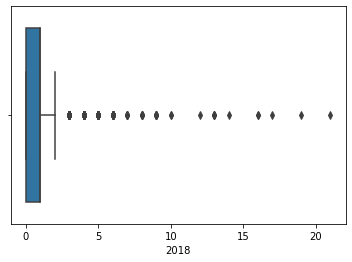

In [101]:
sns.boxplot(x='2018', data=purchases_by_item)

In [103]:
high_volume = purchases_by_item[purchases_by_item['2018'] >= 4]
high_volume.shape

(183, 4)

In [104]:
high_volume.index

Index(['1839e194af5c', '1d97e26bf055', '58853e626a82', '905cd271cdb7',
       '6eb8d2e33c57', '5dd61efe4c79', 'cecf9964d4c2', 'ce507b64d5ac',
       'fb878ac2fe2a', '2d281bbe5406',
       ...
       'f13c341c8abf', 'f1acae8241d3', 'd74bd06e796d', '98c2b425013e',
       '3070f95bf235', 'f4722f5cd7f4', '19ac3b895c5a', 'f63a98179284',
       'dafb81015176', 'fb225b577435'],
      dtype='object', name='item', length=183)